<p align="center">
    <a href="https://colab.research.google.com/drive/1A4kHKq9jrUPrCYXqoOj5iDQVcnRJK9sR?usp=sharing">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
</p>

In [1]:
!gdown https://drive.google.com/uc?id=1GmqNwmZ0FpCGXMfQfsqEU3RqD1lGMuE2 # tags
!gdown https://drive.google.com/uc?id=1oCZZDzovsfBa1l97li1hCJ4aDyE9HmvY # ratings
!gdown https://drive.google.com/uc?id=1HICUSCWLSbU_sug2r5fZZYJsPI1wA5e6 # movies
!gdown https://drive.google.com/uc?id=1fSGJaSAgBqEc7fm1O4L4fps6N3OZxR3Z # links
!gdown https://drive.google.com/uc?id=11Mxekus6vaBFz5f_-RVMKy_40vKqLPs5 # genome tags
!gdown https://drive.google.com/uc?id=14M40G24e0WXln4fGP8phKeIihRCA_AUd # genome scores

Downloading...
From: https://drive.google.com/uc?id=1GmqNwmZ0FpCGXMfQfsqEU3RqD1lGMuE2
To: /content/tag.csv
21.7MB [00:00, 52.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oCZZDzovsfBa1l97li1hCJ4aDyE9HmvY
To: /content/rating.csv
690MB [00:05, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HICUSCWLSbU_sug2r5fZZYJsPI1wA5e6
To: /content/movie.csv
100% 1.49M/1.49M [00:00<00:00, 91.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fSGJaSAgBqEc7fm1O4L4fps6N3OZxR3Z
To: /content/link.csv
100% 539k/539k [00:00<00:00, 71.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=11Mxekus6vaBFz5f_-RVMKy_40vKqLPs5
To: /content/genome_tags.csv
100% 20.4k/20.4k [00:00<00:00, 28.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=14M40G24e0WXln4fGP8phKeIihRCA_AUd
To: /content/genome_scores.csv
214MB [00:01, 146MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import nltk

from collections import Counter

%matplotlib inline

df_movies = pd.read_csv('./movie.csv')
df_ratings = pd.read_csv('./rating.csv')
df_tags = pd.read_csv('./tag.csv')
df_links = pd.read_csv('./link.csv')
df_genome_scores = pd.read_csv('./genome_scores.csv')
df_genome_tags = pd.read_csv('./genome_tags.csv')

In [3]:
# Shapes of the dataset
print('df_movies: ', df_movies.shape)
print('df_ratings: ', df_ratings.shape)
print('df_tags: ', df_tags.shape)
print('df_links: ', df_links.shape)
print('df_genome_scores: ', df_genome_scores.shape)
print('df_genome_tags: ', df_genome_tags.shape)

df_movies:  (27278, 3)
df_ratings:  (20000263, 4)
df_tags:  (465564, 4)
df_links:  (27278, 3)
df_genome_scores:  (11709768, 3)
df_genome_tags:  (1128, 2)


In [4]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [6]:
df_tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [7]:
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
df_genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [9]:
df_genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [10]:
# Number of unique movies
df_movies['title'].nunique()

27262

# Check null values

In [11]:
df_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [12]:
df_tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [13]:
df_links.isnull().sum()

movieId      0
imdbId       0
tmdbId     252
dtype: int64

In [14]:
df_ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [15]:
df_genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [16]:
df_genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

# Number of movies each user rates

In [17]:
df_user_movie = pd.DataFrame()
df_user_movie['movie_count'] = df_ratings.groupby(by='userId')['movieId'].count()

In [18]:
df_user_movie.head()

,movie_count
userId,
1,175
2,61
3,187
4,28
5,66


In [19]:
df_user_movie.describe()

,movie_count
count,138493.000000
mean,144.413530
std,230.267257
min,20.000000
25%,35.000000
50%,68.000000
75%,155.000000
max,9254.000000


Sample first 100 users

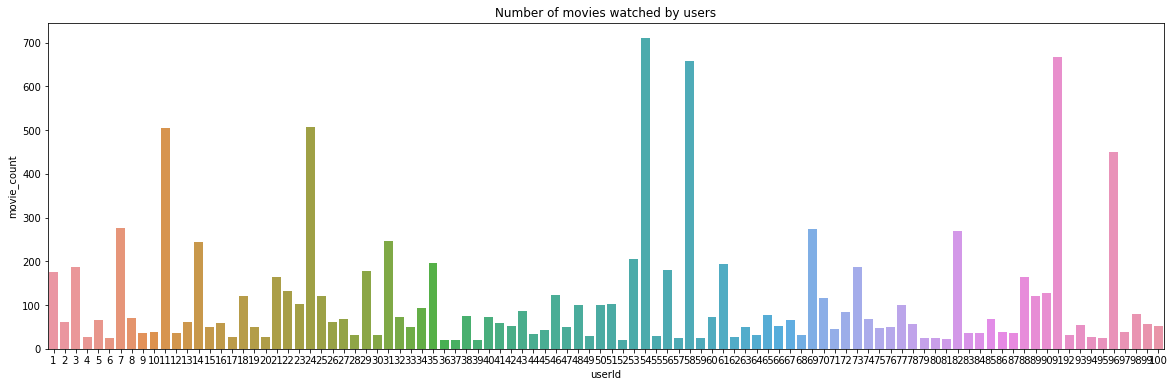

In [20]:
plt.figure(figsize=(20,6))
sns.barplot(x=df_user_movie.index[:100], y='movie_count', data=df_user_movie.iloc[:100]).set(title='Number of movies watched by users')
plt.show()

In [21]:
df_movie_ratings = pd.DataFrame()
df_movie_ratings['average_rating'] = df_ratings.groupby(by='movieId')['rating'].mean()

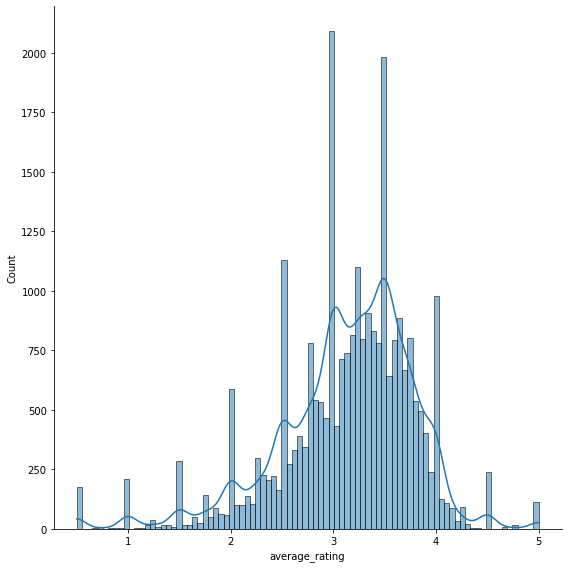

In [22]:
sns.displot(df_movie_ratings['average_rating'].fillna(df_movie_ratings['average_rating'].median()), kde=True, height = 8)

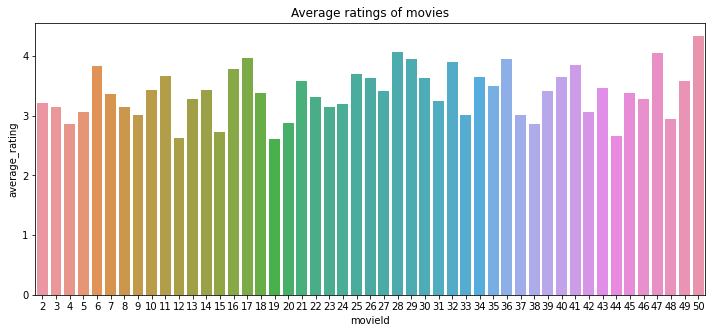

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x=df_movie_ratings.index[1:50], y='average_rating', data=df_movie_ratings.iloc[1:50]).set(title='Average ratings of movies')
plt.show()

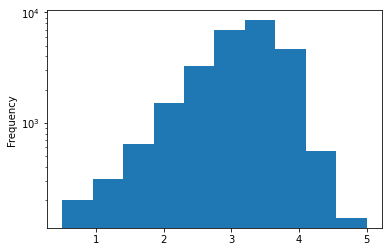

In [24]:
df_movie_ratings['average_rating'].plot(logy=True, kind='hist')

# Check top rated movies

In [25]:
df_movie_ratings_sorted = df_movie_ratings.sort_values(by=['average_rating'], ascending=False)
df_movie_ratings_sorted.reset_index()

,movieId,average_rating
0,95517,5.0
1,105846,5.0
2,89133,5.0
3,105187,5.0
4,105191,5.0
...,...,...
26739,129784,0.5
26740,92479,0.5
26741,129834,0.5
26742,115631,0.5


In [26]:
# Top 20 movies
df_movie_ratings_sorted[:20].merge(df_movies, how='left', on='movieId')

,movieId,average_rating,title,genres
0,95517,5.0,"Barchester Chronicles, The (1982)",Drama
1,105846,5.0,Only Daughter (2013),Drama
2,89133,5.0,Boys (Drenge) (1977),Drama
3,105187,5.0,Linotype: The Film (2012),Documentary
4,105191,5.0,Rocaterrania (2009),Documentary|Fantasy
5,88488,5.0,"Summer Wishes, Winter Dreams (1973)",Drama
6,126945,5.0,Small Roads (2011),(no genres listed)
7,105526,5.0,Year Zero: The Silent Death of Cambodia (1979),Documentary
8,105529,5.0,Stealing a Nation (2004),Documentary
9,105841,5.0,B-Side (2013),Comedy|Romance


In [27]:
df_movie_number_of_being_rated = df_ratings.groupby(by='movieId')['userId'].count()
df_movie_number_of_being_rated = df_movie_number_of_being_rated.reset_index(name="number_of_ratings")

In [28]:
df_movie_number_of_being_rated.head()

,movieId,number_of_ratings
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161


In [29]:
df_movie_ratings_sorted = df_movie_ratings_sorted.merge(df_movie_number_of_being_rated, how='left', on='movieId')


In [30]:
df_movie_ratings_sorted.head()

,movieId,average_rating,number_of_ratings
0,95517,5.0,1
1,105846,5.0,1
2,89133,5.0,1
3,105187,5.0,1
4,105191,5.0,1


In [31]:
df_movie_ratings_sorted = df_movie_ratings_sorted[df_movie_ratings_sorted['number_of_ratings'] > 10000]

In [32]:
df_movie_ratings_with_title_genres = df_movie_ratings_sorted[:20].merge(df_movies, how='left', on='movieId')

In [33]:
df_movie_ratings_with_title_genres[:20]

,movieId,average_rating,number_of_ratings,title,genres
0,318,4.446990,63366,"Shawshank Redemption, The (1994)",Crime|Drama
1,858,4.364732,41355,"Godfather, The (1972)",Crime|Drama
2,50,4.334372,47006,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
3,527,4.310175,50054,Schindler's List (1993),Drama|War
4,1221,4.275641,27398,"Godfather: Part II, The (1974)",Crime|Drama
5,2019,4.274180,11611,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama
6,904,4.271334,17449,Rear Window (1954),Mystery|Thriller
7,912,4.258327,24349,Casablanca (1942),Drama|Romance
8,1193,4.248079,29932,One Flew Over the Cuckoo's Nest (1975),Drama
9,750,4.247287,23220,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War


# Explore which genres are more popular

In [34]:
# Number of unique genres
len(df_movie_ratings_with_title_genres.genres.unique())

17

In [35]:
df_genres_average_ratings = df_movie_ratings_with_title_genres.groupby(by='genres')['average_rating'].mean().reset_index()

In [36]:
popular_genres_df = df_genres_average_ratings.sort_values(by=['average_rating'], ascending=False)
popular_genres_df

,genres,average_rating
10,Crime|Drama,4.362454
12,Crime|Mystery|Thriller,4.334372
15,Drama|War,4.310175
2,Action|Adventure|Drama,4.274180
16,Mystery|Thriller,4.271334
14,Drama|Romance,4.258327
9,Comedy|War,4.247287
13,Drama,4.236108
1,Action|Adventure|Crime|Drama|Thriller,4.235410
3,Action|Adventure|Mystery|Romance|Thriller,4.233538


# Check which genres are most rated

In [37]:
def count_genre(genres):
    '''Create a list by splitting the genre from popular_genre_df and return the count each genre
    INPUT :
      genres - genres in popular_genre_df
    
    OUTPUT:
      Counter(genre) - counter dictionary of genres
    '''
    genre = []
    for gre in genres:
      split_genre = gre.split('|')
      genre.extend(split_genre)
    return Counter(genre)

# Create a counter dictionary to get the count of each genres
genre_dict = count_genre(popular_genres_df['genres'])

# Create dataframe for frequency graph
genre_dict = nltk.FreqDist(genre_dict) 

genre_df = pd.DataFrame({'genres': list(genre_dict.keys()), 'Count': list(genre_dict.values())})

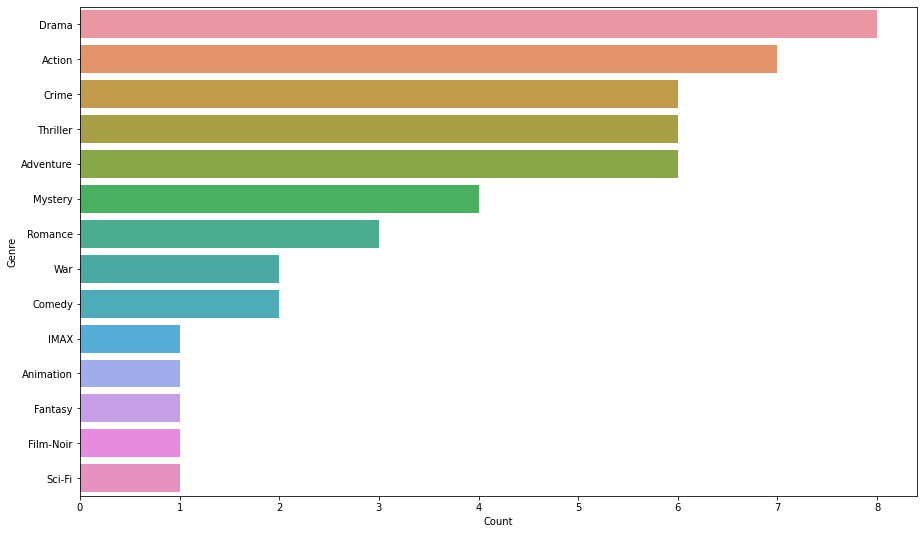

In [38]:
# Plot the graph
g = genre_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(15,9)) 
ax = sns.barplot(data=g, x= "Count", y = "genres") 
ax.set(ylabel = 'Genre') 
plt.show()

# Explore tags

In [39]:
df_tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [40]:
df_movie_tags_counts = df_tags.groupby('movieId')['tag'].count().reset_index()
df_movie_tags_counts_sorted = df_movie_tags_counts.sort_values(by=['tag'], ascending=False)
df_movie_tags_counts_sorted.head()

,movieId,tag
258,296,1994
2465,2959,1779
12883,79132,1552
2117,2571,1430
276,318,1339


In [41]:
df_movie_tags_counts_sorted[:20].merge(df_movies, how='left', on='movieId')

,movieId,tag,title,genres
0,296,1994,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,2959,1779,Fight Club (1999),Action|Crime|Drama|Thriller
2,79132,1552,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX
3,2571,1430,"Matrix, The (1999)",Action|Sci-Fi|Thriller
4,318,1339,"Shawshank Redemption, The (1994)",Crime|Drama
5,7361,1240,Eternal Sunshine of the Spotless Mind (2004),Drama|Romance|Sci-Fi
6,4878,1177,Donnie Darko (2001),Drama|Mystery|Sci-Fi|Thriller
7,4226,1168,Memento (2000),Mystery|Thriller
8,593,1100,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
9,72998,995,Avatar (2009),Action|Adventure|Sci-Fi|IMAX
